In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    # to prevent error with imdb.load_data with numpy 1.16.3
    !pip install numpy==1.16.1 --force-reinstall

In [30]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras import regularizers
import numpy as np

In [31]:
import os
if not os.path.isdir('data1'):
    os.mkdir('data1')

In [3]:
max_features = 10000 
maxlen = 500 
batch_size = 32

In [4]:
np.random.seed(1974)
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)    
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [5]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train, y_train = unison_shuffled_copies(input_train, y_train)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [6]:
print(input_train.shape)
print(input_train[0])

(25000,)
[1, 14, 20, 839, 1674, 8, 61, 523, 308, 3338, 66, 697, 89, 8, 79, 8, 2, 3385, 940, 14, 389, 431, 121, 113, 9, 2395, 143, 4, 330, 5, 483, 7, 4196, 75, 1974, 39, 58, 8, 58, 19, 4, 339, 7, 2728, 5, 1020, 907, 40, 308, 15, 60, 392, 2373, 40, 4196, 28, 6, 483, 13, 43, 426, 570, 61, 1674, 60, 151, 4, 22, 47, 6, 654, 130, 14, 9, 87, 103, 3086, 7, 108, 13, 219, 143, 61, 113, 4196, 66, 2842, 72, 1685, 14, 9, 103, 4, 1558, 2, 4, 333, 431, 15, 66, 679, 72, 6805, 180]


In [7]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [8]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [9]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.6137 - acc: 0.6532 - val_loss: 0.4513 - val_acc: 0.8108
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3887 - acc: 0.8365 - val_loss: 0.4642 - val_acc: 0.7882
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2977 - acc: 0.8821 - val_loss: 0.3637 - val_acc: 0.8428
Epoch 4/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2316 - acc: 0.9103 - val_loss: 0.3909 - val_acc: 0.8532
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1728 - acc: 0.9379 - val_loss: 0.3748 - val_acc: 0.8494
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1210 - acc: 0.9566 - val_loss: 0.4040 - val_acc: 0.8664
Epoch 7/1

#one experiment...
early_stopping=EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001,
                             verbose=True)
checkpoint = ModelCheckpoint('weights.lstm.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = Sequential()
model.add(Embedding(max_features, 32, 
                    embeddings_regularizer=regularizers.l2(0.001)))
model.add(LSTM(32, 
               dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model.compile(optimizer=Adam(lr=0.002),
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=100,
            batch_size=128,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr, checkpoint])

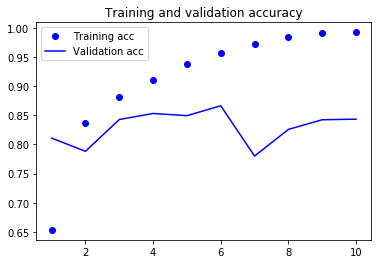

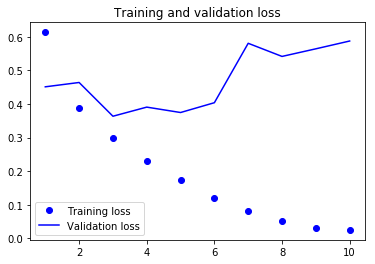

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
from keras.layers import LSTM, Bidirectional

In [13]:
early_stopping=EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint('data/weights.lstm.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = Sequential()
model.add(Embedding(max_features, 32, 
                    embeddings_regularizer=regularizers.l2(0.001)))
model.add(LSTM(32, 
               dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model.compile(optimizer=Adam(lr=0.002),
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=100,
            batch_size=128,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr, checkpoint])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 84s 4ms/step - loss: 0.6191 - acc: 0.7093 - val_loss: 0.5694 - val_acc: 0.7678

Epoch 00001: val_acc improved from -inf to 0.76780, saving model to data/weights.lstm.best.hdf5
Epoch 2/100
20000/20000 [==============================] - 84s 4ms/step - loss: 0.5211 - acc: 0.8111 - val_loss: 0.5323 - val_acc: 0.8036

Epoch 00002: val_acc improved from 0.76780 to 0.80360, saving model to data/weights.lstm.best.hdf5
Epoch 3/100
20000/20000 [==============================] - 83s 4ms/step - loss: 0.5194 - acc: 0.8196 - val_loss: 0.5428 - val_acc: 0.8030

Epoch 00003: val_acc did not improve from 0.80360
Epoch 4/100
20000/20000 [==============================] - 83s 4ms/step - loss: 0.6071 - acc: 0.7731 - val_loss: 0.5253 - val_acc: 0.8154

Epoch 00004: val_acc improved from 0.80360 to 0.81540, saving model to data/weights.lstm.best.hdf5
Epoch 5/100
20000/20000 [==========================

20000/20000 [==============================] - 82s 4ms/step - loss: 0.2718 - acc: 0.9329 - val_loss: 0.3959 - val_acc: 0.8836

Epoch 00040: val_acc improved from 0.88180 to 0.88360, saving model to data/weights.lstm.best.hdf5
Epoch 41/100
20000/20000 [==============================] - 83s 4ms/step - loss: 0.2641 - acc: 0.9364 - val_loss: 0.4025 - val_acc: 0.8874

Epoch 00041: val_acc improved from 0.88360 to 0.88740, saving model to data/weights.lstm.best.hdf5
Epoch 42/100
20000/20000 [==============================] - 83s 4ms/step - loss: 0.2628 - acc: 0.9378 - val_loss: 0.4051 - val_acc: 0.8882

Epoch 00042: val_acc improved from 0.88740 to 0.88820, saving model to data/weights.lstm.best.hdf5
Epoch 43/100
20000/20000 [==============================] - 83s 4ms/step - loss: 0.2605 - acc: 0.9383 - val_loss: 0.4084 - val_acc: 0.8748

Epoch 00043: val_acc did not improve from 0.88820
Epoch 44/100
20000/20000 [==============================] - 86s 4ms/step - loss: 0.2552 - acc: 0.9398 - va

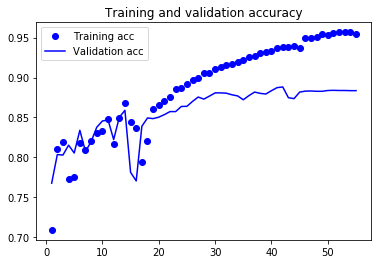

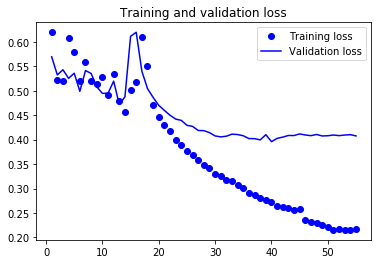

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## BiLSTM

In [15]:
early_stopping=EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001,
                             verbose=True)
checkpoint = ModelCheckpoint('data/weights.bilstm.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = Sequential()
model.add(Embedding(max_features, 32, 
                    embeddings_regularizer=regularizers.l2(0.001)))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.5, dropout=0.5)))
model.add(Dense(1, activation='sigmoid', 
                kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model.compile(optimizer=Adam(lr=0.001),
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=100,
            batch_size=128,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr, checkpoint])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 133s 7ms/step - loss: 0.6951 - acc: 0.6128 - val_loss: 0.5748 - val_acc: 0.7496

Epoch 00001: val_acc improved from -inf to 0.74960, saving model to data/weights.lstm.best.hdf5
Epoch 2/100
20000/20000 [==============================] - 132s 7ms/step - loss: 0.5781 - acc: 0.7486 - val_loss: 0.5499 - val_acc: 0.7706

Epoch 00002: val_acc improved from 0.74960 to 0.77060, saving model to data/weights.lstm.best.hdf5
Epoch 3/100
20000/20000 [==============================] - 126s 6ms/step - loss: 0.5425 - acc: 0.7815 - val_loss: 0.5376 - val_acc: 0.7820

Epoch 00003: val_acc improved from 0.77060 to 0.78200, saving model to data/weights.lstm.best.hdf5
Epoch 4/100
20000/20000 [==============================] - 123s 6ms/step - loss: 0.5206 - acc: 0.8051 - val_loss: 0.5430 - val_acc: 0.7794

Epoch 00004: val_acc did not improve from 0.78200
Epoch 5/100
20000/20000 [======================

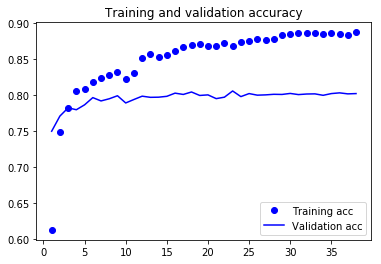

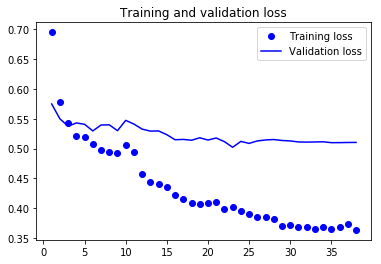

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# CNN

In [18]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop, Adam

In [35]:
early_stopping=EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001,
                             verbose=True)
checkpoint = ModelCheckpoint('data/weights.cnn.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

l2 = 0.001
dout = 0.25

model = Sequential()
model.add(layers.Embedding(max_features, 32, input_length=maxlen, embeddings_regularizer=regularizers.l2(l2)))
model.add(layers.Dropout(dout))
model.add(layers.Conv1D(32, 7, activation='relu', 
                        kernel_regularizer=regularizers.l2(l2)))
model.add(layers.MaxPooling1D(5))
model.add(layers.Dropout(dout))
model.add(layers.Conv1D(32, 7, activation='relu', kernel_regularizer=regularizers.l2(l2)))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(dout))
model.add(layers.Dense(1, kernel_regularizer=regularizers.l2(l2)))
model.summary()
model.compile(optimizer=Adam(lr=1e-4),
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=100,
            batch_size=16,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr, checkpoint])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
dropout_17 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 98, 32)            0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 98, 32)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 32)                0         
__________

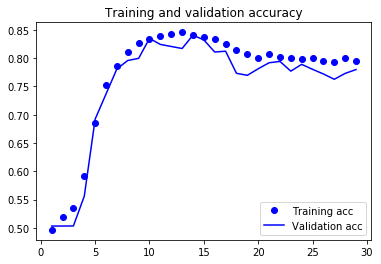

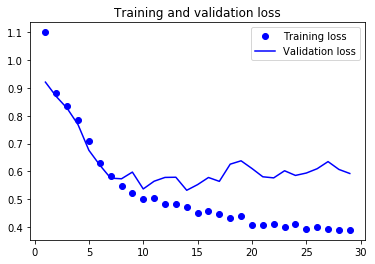

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()